In [164]:
import pandas as pd

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re

In [165]:
# Used to mark where in a histogram the station is located. 
# Code belongs to Tony Babarino from stackoverflow.com.
# http://stackoverflow.com/questions/35890738/change-the-colour-of-a-matplotlib-histogram-bin-bar-given-a-value

def marked_hist(column,new_ax):
    p = master[column].plot(kind="hist", color='teal',bins=20, ax=new_ax)
    bar_value_to_label = float(Inspect_Station[column].to_string(index=False))
    min_distance = float("inf")
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
            
    x = Inspect_Station[column].to_string(index=False)
    if x != 'NaN':
        p.patches[index_of_bar_to_label].set_color('red')

In [166]:
master = pd.read_csv("../Master/Master.csv")
master.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,SC_Wait_Complete_Increase,SC_Wait_Complete_Increase_%,MH_Wait_Pending_Increase,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,-0.61,-0.182635,0.85,0.338645,0.44,0.307692,0.029907,0.033158,0.052457,0.050413
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,0.86,0.267081,1.07,0.272959,0.48,0.571429,0.038846,0.055806,0.047889,0.054539
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,0.71,0.133962,-1.34,-1.196429,-2.91,-0.792916,0.154349,0.093525,0.104459,0.102658
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,2.58,0.813880,-0.84,-0.506024,-0.46,-0.174905,0.047089,0.051000,0.088287,0.092925
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,-0.72,-0.197260,0.08,0.030075,-0.07,-0.023256,0.035160,0.031584,0.038942,0.042602


In [168]:
Inspect_Station = master[master["ID"] =="402to"]

In [169]:
# Get Station number
Station=Inspect_Station["Station"].to_string(index=False)

# Get Location
query = r"^([A-z]*) "
query = r"\) ([A-z]+, [A-z]+)"
m = re.search(query, Inspect_Station["Location"].to_string(index=False))
Location = m.group(1)

# Get Staff Size
Staff_2016 = str(int(float(Inspect_Station["MAY-FY16"].to_string(index=False))))

# Get percent change ins staff 2014 to 2016
staff_percent_change = str(round(float(Inspect_Station["Staff_14_To_16_Increase_%"].to_string(index=False)),4)*100)

# increase or decrease
if float(staff_percent_change) >0:
    I_D = "an increase"
elif float(staff_percent_change) == 0:
    I_D = "neither an increase or decrease"
    staff_percent_change_abs = str(abs(float(staff_percent_change)))
else:
    I_D = " a decrease"

# Mean staff increase
master_staff_percent_change = str(round(master["Staff_14_To_16_Increase_%"].mean(),5)*100)

In [170]:
master_staff_percent_change

'7.325'

In [171]:
staff_percent_change

'11.27'

# Story

Station 402, located in Togus, ME, has a staff size of 1446. This represent an increase of 11.27 percent compared with May 2014, right before Veterans Choice was passed.
This is more than the national average of 7.325 percent.


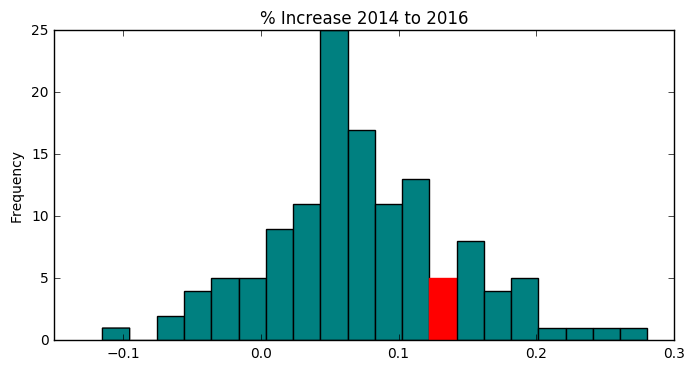

In [172]:
sentence_1 =  'Station {}, located in {}, has a staff size of {}. '\
'This represent {} of {} percent compared with May 2014, right before Veterans Choice was passed.'\
.format(Station,Location,Staff_2016,I_D,staff_percent_change)

if staff_percent_change == master_staff_percent_change:
    sentence_2 = 'This is the same as the national average of {} percent'\
    .format(master_staff_percent_change)
elif float(staff_percent_change) > float(master_staff_percent_change):
    sentence_2 = "This is more than the national average of {} percent."\
    .format(master_staff_percent_change)
elif float(staff_percent_change) < float(master_staff_percent_change):
    sentence_2 = "This is less than the national average of {} percent."\
    .format(master_staff_percent_change)
else:
    sentence_2 = "placeholder"

print sentence_1
print sentence_2

fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
ax1.set_title("% Increase 2014 to 2016")
ax1 = marked_hist("Staff_14_To_16_Increase_%",ax1)


In [173]:
# Choice Hires

sentence_3 = "Station {} has {} staffer hired under the choice act as of "